# Music dataset analysis

dataset source<br>
https://www.kaggle.com/datasets/undefinenull/million-song-dataset-spotify-lastfm/data

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_df = pd.read_csv('User Listening History.csv')
music_df = pd.read_csv('Music Info.csv')

In [3]:
user_df.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


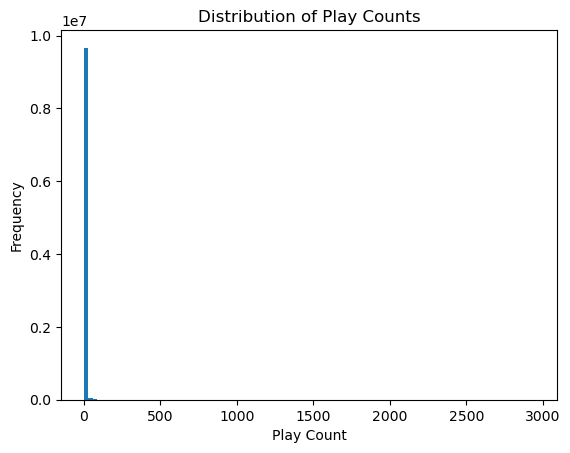

In [34]:
# plot distribution of play counts
plt.hist(user_df['playcount'], bins=100)
plt.xlabel('Play Count')
plt.ylabel('Frequency')
plt.title('Distribution of Play Counts')
plt.show()


In [51]:
len(user_df)

9711301

In [56]:
user_df_less_than_x = user_df[user_df['playcount'] <= 20]

In [57]:
len(user_df_less_than_x)

9608283

In [58]:
user_df_less_than_x.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [59]:
user_df_less_than_x.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [60]:
# check if all track_id's in user_df are in music_df
track_id = user_df_less_than_x['track_id']
track_id_in_music_df = track_id.isin(music_df['track_id'])
track_id_in_music_df.value_counts()


track_id
True    9608283
Name: count, dtype: int64

In [61]:
sns.set_theme(style="white", context="talk")

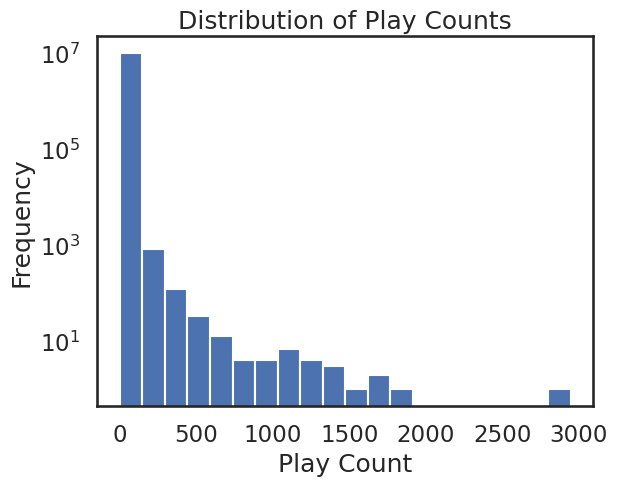

In [67]:
# histogram of play counts using pyplot
plt.hist(user_df['playcount'], bins=20)
plt.xlabel('Play Count')
plt.yscale('log')
plt.ylabel('Frequency')
plt.title('Distribution of Play Counts')
plt.show()


In [79]:
# aggregate play counts for faster plotting
grouped_playcounts = user_df.groupby('playcount').size().reset_index(name='counts')
grouped_playcounts.head()

,playcount,counts
0,1,5906620
1,2,1516649
2,3,661023
3,4,370936
4,5,370818


KeyError: 0

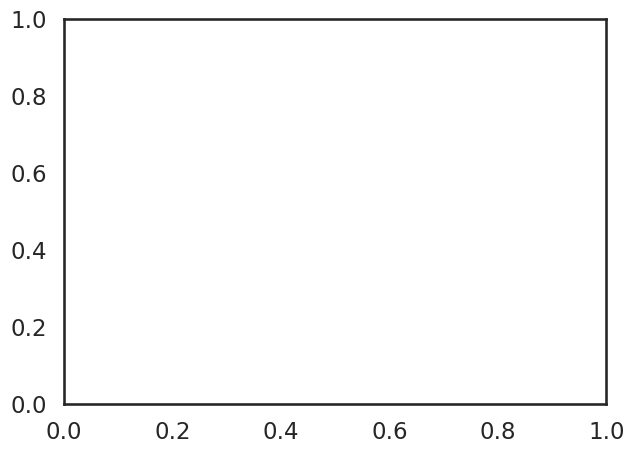

In [91]:
# 100 samples from user_df
user_df_sample = user_df['playcount'].sample(n=100)

# histogram of play counts
f, ax = plt.subplots(figsize=(7, 5), sharex=True)

sns.barplot(user_df_sample, palette="rocket", ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Play Count")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

In [16]:
len(music_df)

50683

In [17]:
# check if Cardi B is in music_df, just because she is modern
music_df[music_df['artist'] == 'Cardi B']

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
14993,TRCSJHC128F9336428,Be Careful,Cardi B,https://p.scdn.co/mp3-preview/befe3cd3011f62ef...,2Yl4OmDby9iitgNWZPwxkd,"rap, blues, hip_hop, american, rnb",NaN,2018,210787,0.820,...,6,-8.230,0,0.411,0.0256,0.000000,0.0952,0.535,152.279,4
15008,TRUEERB128F4288B1F,Please Me,Cardi B,https://p.scdn.co/mp3-preview/a25d43f3262e0762...,0PG9fbaaHFHfre2gUVo7AN,"soul, rap, hip_hop, rnb",NaN,2019,200889,0.747,...,1,-6.711,1,0.081,0.0642,0.000000,0.0832,0.650,133.992,4
29510,TRHZPRU12903CA1EFA,Money Bag,Cardi B,https://p.scdn.co/mp3-preview/3157a8e45586829b...,1vBeIXlzbAieGoDqInav5j,"rap, hip_hop, house",NaN,2018,229004,0.947,...,10,-6.138,0,0.124,0.1070,0.000691,0.1080,0.454,129.977,4


In [18]:
# check for max year and min year in music_df
max_year = music_df['year'].max()
min_year = music_df['year'].min()
print(max_year)
print(min_year)


2022
1900


In [22]:
music_df.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [19]:
# music_df missing values
music_df.isnull().sum()

track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64

In [20]:
# genre value counts
music_df['genre'].value_counts()

genre
Rock          9965
Electronic    3710
Metal         2516
Pop           1145
Rap            821
Jazz           793
RnB            696
Reggae         691
Country        607
Punk           383
Folk           355
New Age        237
Blues          189
World          140
Latin          100
Name: count, dtype: int64

In [21]:
# head of music_df rows where genre is not missing
music_df[music_df['genre'].notnull()].head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
8,TRMZXEW128F9341FD5,The Scientist,Coldplay,https://p.scdn.co/mp3-preview/95cb9df1b056d759...,0GSSsT9szp0rJkBrYkzy6s,"rock, alternative, indie, pop, alternative_roc...",Rock,2007,311014,0.566,...,5,-7.826,1,0.0242,0.715000,0.000014,0.1200,0.173,146.365,4
10,TRIODZU128E078F3E2,Under the Bridge,Red Hot Chili Peppers,https://p.scdn.co/mp3-preview/90e41778392f27b6...,06zh28PcYIFvNOAz5Wq2Xb,"rock, alternative, alternative_rock, 90s, funk",Pop,2003,265506,0.554,...,4,-8.046,1,0.0457,0.016800,0.000534,0.1360,0.513,84.275,4
12,TRYEZGE128F92D04C8,Feel Good Inc.,Gorillaz,https://p.scdn.co/mp3-preview/7388c425022ced92...,09xrHi86kLkEIzDLZiHNnv,"rock, electronic, alternative, indie, pop, alt...",RnB,2010,223106,0.809,...,6,-7.776,1,0.1360,0.033700,0.001410,0.8260,0.832,138.556,4


<Axes: xlabel='genre'>

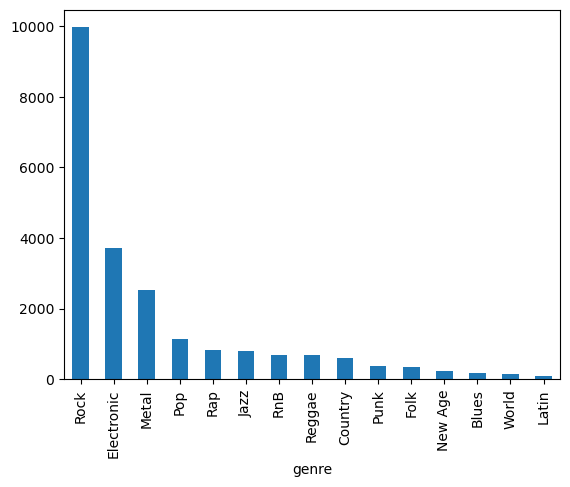

In [23]:
# pie chart of genres

<Axes: xlabel='year'>

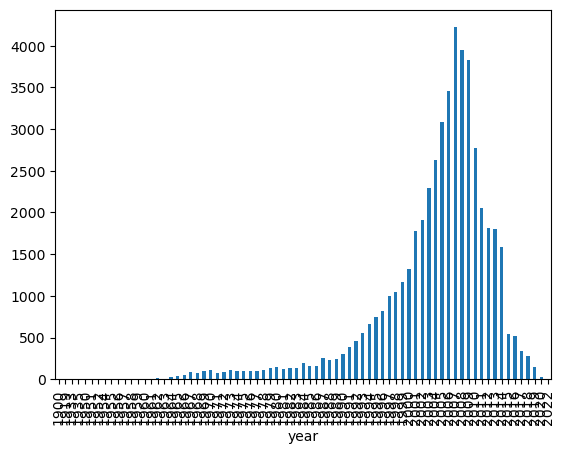

In [25]:
# plot distribution of year
music_df_by_year = music_df.groupby('year').count()
music_df_by_year['track_id'].plot(kind='bar')

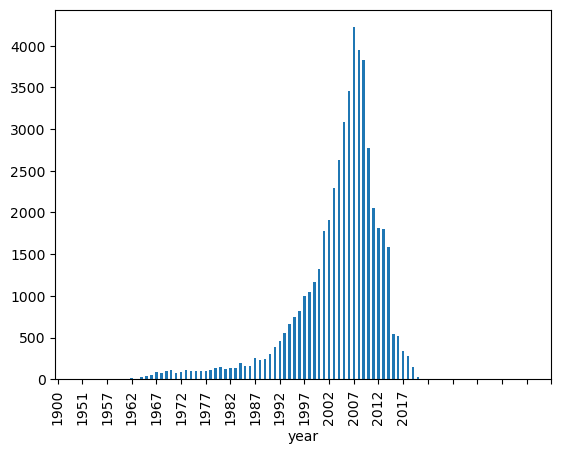

In [29]:
# plot distribution of year with tick labels occuring every 5 years
music_df_by_year = music_df.groupby('year').count()
music_df_by_year['track_id'].plot(kind='bar')
plt.xticks(np.arange(0, 101, 5))
plt.show()


In [31]:
music_df.sort_values(by=['year']).head(20)

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
41247,TRRTDHQ12903CB63A2,Let Me Have This,The Radio Dept.,https://p.scdn.co/mp3-preview/5a02a74ce40aee48...,0MM1mdJkVHudArVkrC97vE,"indie, indie_pop, swedish",Rock,1900,220013,0.299,...,2,-7.916,1,0.0287,0.1160,0.505000,0.0649,0.236,99.980,3
40854,TRXPBOK128F4263F73,Do What You Wanna Do,Acid House Kings,https://p.scdn.co/mp3-preview/4996f553d876436b...,0HLWF2LTjdvgaNWv81N6iW,"indie_pop, swedish",NaN,1900,187826,0.642,...,11,-6.658,0,0.0273,0.0253,0.000030,0.0899,0.966,129.984,4
40773,TRUPZCY128F4270FCC,I Wanted You To Feel The Same,The Radio Dept.,https://p.scdn.co/mp3-preview/31c9e409c5006698...,0HIBfeCis0OvV5orUMgSN5,"indie, swedish",Rock,1900,151040,0.627,...,0,-8.704,1,0.0296,0.2430,0.092300,0.2980,0.273,114.984,4
40766,TRUHYRG128F4270FCA,Pet Grief,The Radio Dept.,https://p.scdn.co/mp3-preview/288fe7f90b01f56d...,1i1BtKJNp23vLMLVcGHYM0,"indie, swedish",Rock,1900,190386,0.481,...,4,-4.586,1,0.0394,0.0354,0.626000,0.5420,0.641,103.008,4
7253,TRCQKHP128EF35424B,Street Life,Randy Crawford,https://p.scdn.co/mp3-preview/634fccbb9677b797...,0d9V9KUETQDmK2P5HjwceK,"female_vocalists, jazz, soul, soundtrack, funk...",NaN,1900,254226,0.658,...,10,-8.646,0,0.0449,0.1010,0.004000,0.1340,0.830,107.433,4
20981,TRVFYPS12903CE6989,Clean Up Woman,Betty Wright,https://p.scdn.co/mp3-preview/f9281960cad8c97e...,0GKmfAEQUJUkFjpudwoYs0,"soul, funk, 70s",RnB,1900,166533,0.810,...,5,-7.270,1,0.0791,0.4370,0.000091,0.0717,0.877,89.618,4
28939,TRLIHGJ128F93466DD,Inside of Me,Benny Benassi,https://p.scdn.co/mp3-preview/06246abb4f4db525...,11tf9qXf9dPYfOrKOe5ohJ,"electronic, dance, trance, house, techno",NaN,1900,232880,0.832,...,9,-3.930,1,0.1480,0.2470,0.755000,0.3460,0.667,129.918,4
47618,TRSFPNL12903CB64E7,What You Sell,The Radio Dept.,https://p.scdn.co/mp3-preview/ac14606ab27cf843...,0rffrBUYsrOpJg52brsUYy,"indie, indie_pop",NaN,1900,189986,0.593,...,2,-7.039,1,0.0310,0.0385,0.144000,0.0720,0.344,124.999,4
37566,TRWFVOK128F9334A97,Liebesfreud,Sergei Rachmaninoff,https://p.scdn.co/mp3-preview/a50e409b34e456b7...,06S8notZMhj6dLjLOHacbR,"classical, piano, russian",NaN,1919,299000,0.409,...,5,-18.360,1,0.0393,0.9910,0.876000,0.0946,0.234,106.760,4
21800,TRFNPHM128F428FF59,Liebesleid,Sergei Rachmaninoff,https://p.scdn.co/mp3-preview/0913b074f442783f...,0oku4e66MHe4XgOTgPKZM6,"classical, piano, russian",Jazz,1919,259666,0.318,...,9,-26.445,0,0.0345,0.9940,0.227000,0.3880,0.246,66.040,3
